# 📊 Análise de Faturamento de Vendas

Projeto de análise de dados utilizando Python e Pandas, com foco em faturamento mensal e desempenho de produtos.


In [4]:
import pandas as pd

df = pd.read_csv('../vendas.csv')
df.head()

,data_venda,produto,categoria,quantidade,preco_unitario,regiao,vendedor
0,2024-01-05,Notebook,Eletrônicos,2,3500,Sudeste,Ana
1,2024-01-10,Mouse,Eletrônicos,5,80,Sudeste,Carlos
2,2024-02-02,Teclado,Eletrônicos,3,150,Sul,Marcos
3,2024-02-15,Monitor,Eletrônicos,1,1200,Sudeste,Ana
4,2024-03-01,Cadeira,Escritório,2,900,Nordeste,Paula


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_venda      9 non-null      datetime64[ns]
 1   produto         9 non-null      object        
 2   categoria       9 non-null      object        
 3   quantidade      9 non-null      int64         
 4   preco_unitario  9 non-null      int64         
 5   regiao          9 non-null      object        
 6   vendedor        9 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 636.0+ bytes


In [14]:
df.dtypes


data_venda        datetime64[ns]
produto                   object
categoria                 object
quantidade                 int64
preco_unitario             int64
regiao                    object
vendedor                  object
faturamento                int64
dtype: object

In [9]:
df.dtypes


data_venda        datetime64[ns]
produto                   object
categoria                 object
quantidade                 int64
preco_unitario             int64
regiao                    object
vendedor                  object
dtype: object

In [10]:
df['faturamento'] = df['quantidade'] * df['preco_unitario']
df.head()


,data_venda,produto,categoria,quantidade,preco_unitario,regiao,vendedor,faturamento
0,2024-01-05,Notebook,Eletrônicos,2,3500,Sudeste,Ana,7000
1,2024-01-10,Mouse,Eletrônicos,5,80,Sudeste,Carlos,400
2,2024-02-02,Teclado,Eletrônicos,3,150,Sul,Marcos,450
3,2024-02-15,Monitor,Eletrônicos,1,1200,Sudeste,Ana,1200
4,2024-03-01,Cadeira,Escritório,2,900,Nordeste,Paula,1800


In [11]:
df['faturamento'].sum()


np.int64(17550)

In [12]:
df.groupby('produto')['quantidade'].sum().sort_values(ascending=False)


produto
Mouse       15
Cadeira      3
Teclado      3
Notebook     3
Mesa         1
Monitor      1
Name: quantidade, dtype: int64

In [15]:
faturamento_mensal = (
    df
    .groupby(df['data_venda'].dt.to_period('M'))['faturamento']
    .sum()
)

faturamento_mensal


data_venda
2024-01    7400
2024-02    1650
2024-03    6800
2024-04    1700
Freq: M, Name: faturamento, dtype: int64

In [17]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


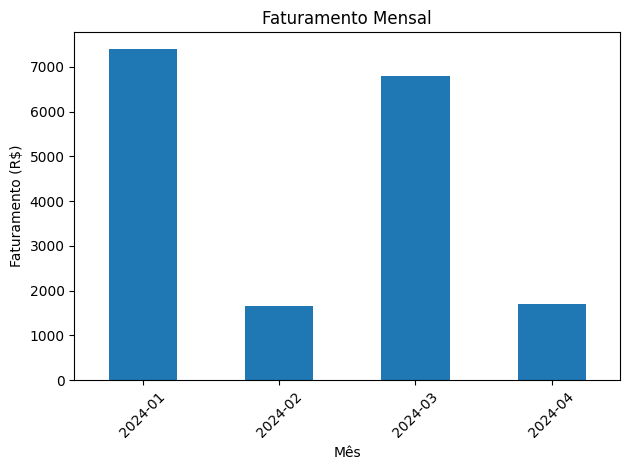

In [18]:
import matplotlib.pyplot as plt

faturamento_mensal.plot(kind='bar')
plt.title('Faturamento Mensal')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📈 Insight

O faturamento apresentou maior volume nos meses de janeiro e março, enquanto fevereiro e abril tiveram desempenho inferior, indicando possível sazonalidade ou impacto de campanhas pontuais.
